# Problema de rezolvat

Se propune gasirea celor mai bune modele pentru predictia a patru clase de caini si a longevitatii acestora pe baza unor feature-uri continue si categorice. Pentru predictia claselor vor fi incercate modele de clasificare(Logistic Regression, KNN, Random Forest), iar pentru predictia longevitatii, se vor folosi modele pentru regresie(Linear Regression, Lasso, Ridge, Elastic Net).

Tabelul de date contine si randuri care nu au valori atribuite. Din analiza de mai jos se observa ca exista o singura coloana cu aceasta proprietate. Rezolvarea problemei este abordata in doua moduri si este descrisa mai jos. De asemenea, setul de date are si informatii care nu influenteaza rezultatele dorite. Prin urmare, acele date vor fi ignorate('Owner Name').

# Analiza rezultatelor

Pentru gasirea celor mai buni hiperparametri, au fost testate cat mai multe combinatii. Script-ul de generare si salvare in format csv, impreuna cu tabelele obtinute, pot fi gasite <a href='https://github.com/GabiAD/Dogs-Breed-Classification-and-Longevity-Regression'>aici</a>.

Se citesc cele mai bune valori din tabelele in care au fost salvati hiperparametrii. Pentru clasificare, se considera metrica F1 score, iar pentru regresie valoarea mse(mean squared error). Se poate observa mai jos, din plotul probabilitatii unei clase intr-o anumita arie si din ilustrarea diferentei dintre valorile reale si cele prezise ale longevitatii, ca hiperparametrii alesi indeplinesc sarcina dorita.

Mai jos sunt prezentate cele mai bune valori pentru toate modelele testate.
Cel mai mare F1 score a fost obtinut de Logistic Regression: 0.957878, iar cel mai mic mse de Ridge: 1.05475. Prin urmare, au fost considerate aceste modele cu hiperparametrii specifici pentru indeplinirea sarcinilor propuse. Totusi, acest ipynb contine si reprezentarea celorlale modele pentru a demonstra pasii de lucru.

In [2]:
import pandas

classification_results = pandas.read_csv('https://raw.githubusercontent.com/GabiAD/Dogs-Breed-Classification-and-Longevity-Regression/master/log_hyperparameters_cls.csv')
regression_results = pandas.read_csv('https://raw.githubusercontent.com/GabiAD/Dogs-Breed-Classification-and-Longevity-Regression/master/log_hyperparameters_reg.csv')

classification_results = classification_results.sort_values(by=['Logistic_F1'], ascending=False)
best_classification_hyperparameters = classification_results.iloc[0]
print('Best Logistic Regression hyperparameters: ')
print(classification_results.iloc[0])
print()

classification_results = classification_results.sort_values(by=['KNN_F1'], ascending=False)
print('Best KNN hyperparameters: ')
print(classification_results.iloc[0])
print()

classification_results = classification_results.sort_values(by=['Random_forest_F1'], ascending=False)
print('Best Random Forest hyperparameters: ')
print(classification_results.iloc[0])
print()

regression_results = regression_results.sort_values(by=['linear_regression_mse'], ascending=True)
print('Best Linear Regression hyperparameters: ')
print(regression_results.iloc[0])
print()

regression_results = regression_results.sort_values(by=['linear_regression_mse'], ascending=True)
print('Best Lasso hyperparameters: ')
print(regression_results.iloc[0])
print()

regression_results = regression_results.sort_values(by=['ridge_mse'], ascending=True)
print('Best Ridge hyperparameters: ')
print(regression_results.iloc[0])
print()

regression_results = regression_results.sort_values(by=['elastic_net_mse'], ascending=True)
print('Best Elastic Net hyperparameters: ')
print(regression_results.iloc[0])
print()

regression_results = regression_results.sort_values(by=['knr_mse'], ascending=True)
print('Best KNeighborsRegressor hyperparameters: ')
print(regression_results.iloc[0])
print()



Best Logistic Regression hyperparameters: 
index                                  95
keep_incomplete_data                False
normalize_data                      False
standardize_data                     True
full_one_hot                        False
polynomial_degree                       1
logistic_penalty                       l2
logistic_C                              2
logistic_solver                 newton-cg
logistic_multiclass           multinomial
random_forest_n_estimators            100
random_forest_criterion              gini
knn_n_neighbours                        4
knn_algorithm                        auto
knn_p                                   2
Logistic_Acuracy                 0.957755
KNN_Acuracy                      0.922262
Random_forest_Acuracy            0.932374
Logistic_Precision               0.959799
KNN_Precision                    0.926999
Random_forest_Precision          0.934346
Logistic_F1                      0.957878
KNN_F1                           

# Incarcarea, analiza si preprocesarea dataset-ului

## Hiperparametrii

Exista hiperparametrii care influenteaza atat modelul pentru clasificare, cat si modelul pentru regresie, dar nu au aceleasi valori pentru obtinerea celor mai bune rezultate in ambele cazuri. De aceea, classification_test_model va indica pentru ce model sunt setati hiperparametrii partajati pentru cele doua task-uri.

In acest ipynb au fost setati cei mai buni hiperparametrii gasiti, iar pentru obtinerea rezultatelor corespunzatoare trebuie setat classification_test_model pe True daca se doreste examinarea modelului de clasificare sau pe False, daca se vrea evaluarea regresiei.

Acesti hiperparametrii au fost alesi deoarece au rezultat in cel mai bun F1 score pentru clasificare() si cea mai mica valoare mse pentru regresie(in cazul modelului Ridge).

In [128]:
classification_test_model = True

In [144]:
import numpy as np

if classification_test_model:
    keep_incomplete_data = True

    normalize_data = False
    standardize_data = True

    full_one_hot = False
    
    polynomial_degree = 1
else:
    keep_incomplete_data = False

    normalize_data = False
    standardize_data = True

    full_one_hot = False

    polynomial_degree = 3

# Logistic hyperparameters
logistic_penalty = "l2"
logistic_C = 2
logistic_solver = 'newton-cg'
logistic_multiclass = 'multinomial'

# Random forest
random_forest_n_estimators = 50
random_forest_criterion = 'gini'

# KNN
knn_n_neighbours = 1
knn_algorithm = 'auto'
knn_p = 1

# Regression general
reg_fit_intercept = True

# Lasso
lasso_alpha = 1.0

# Ridge
ridge_alpha = 1.0
ridge_solver = 'auto'

# Elastic Net
el_net_alpha = 1.0
el_net_l1_ratio = 0.5

# KNeighborsRegressor
knr_n_neighbors = 15
knr_weights = 'distance'
knr_p = 2


Este incarcat dataset-ul, iar coloana 'Owner Name' este eliminata deoarece nu influenteaza nici rasa cainilor, nici longevitatea acestora.
De asemenea, este testat setul de date pentru valori lipsa. Se observa ca lipsesc valori doar din coloana Height(cm). Putem astfel aborda doua directii: eliminam datele incomplete sau introducem noi date posibile.

In [145]:
import pandas
import numpy as np

data = pandas.read_csv('https://raw.githubusercontent.com/GabiAD/Dogs-Breed-Classification-and-Longevity-Regression/master/dataset.csv')

# Rezultatele NU depind de Owner Name
data = data.drop(columns=['Owner Name'])

print(data.isnull().sum())


Breed Name           0
Weight(g)            0
Height(cm)         211
Longevity(yrs)       0
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


Pentru normalizare, a fost folosita functia sklearn preprocessing.normalize, care imparte fiecare valoare la norma 2, de aceea am salvat aceasta norma in variabila longevity_norm pentru a o inmulti cu predictia retelei, observand astfel datele la scala reala.
De asemenea, pe langa aceasta abordare, in unele incercari de gasire a celor mai buni hiperparametrii, datele au fost standardizate, iar in acele cazuri, datele au fost aduse la scala initiala prin metode corespunzatoare, reusind astfel sa comparam rezultatele in raport cu aceeasi unitate de masura.

In [146]:
longevity_norm = np.sqrt(np.sum(data["Longevity(yrs)"] ** 2))

In [147]:
print(data.std())

Weight(g)         5214.311336
Height(cm)           6.031454
Longevity(yrs)       1.074443
dtype: float64


A fost plotata longevitatea in functie de valorile continue pentru a vedea daca exista o dependenta liniara intre acestea. Se poate observa o corespondenta in figura obtinuta, dar o reprezentare mult mai clara a datelor este ilustrata intr-o sectiune ulterioaara.

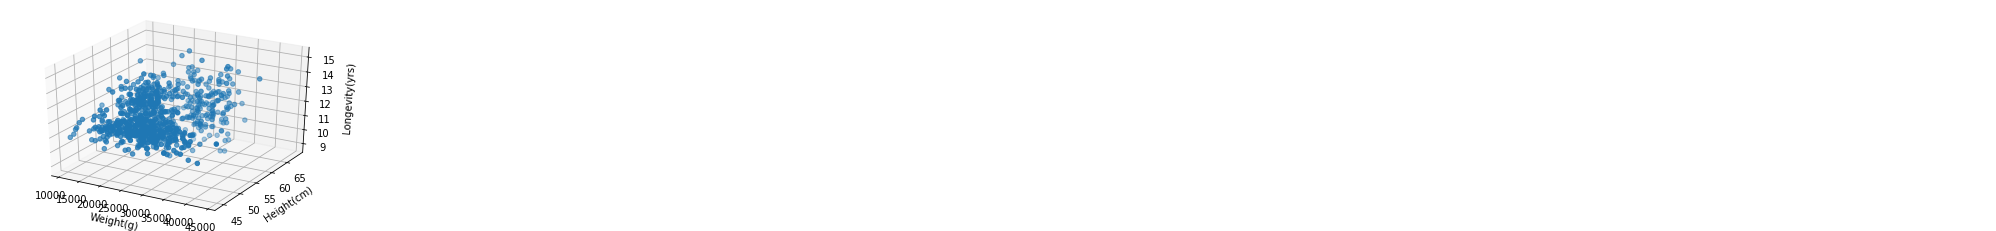

In [149]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Weight(g)")
ax.set_ylabel("Height(cm)")
ax.set_zlabel("Longevity(yrs)")
ax.scatter(data["Weight(g)"], data["Height(cm)"], data["Longevity(yrs)"])

fig.show()

In functie de flag-ul keep_incomplete_data, datele incomplete pot fi ignorate sau completate pe baza valorilor existente in setul de date.
In cazul al doilea, procesul are mai multi pasi:
1. sunt eliminate datele incomplete din setul de baza
2. datele ramase sunt reasezate in ordine aleatoare
3. se creeaza o noua variabila care contine datele nou create
4. datele noi sunt introduse astfel incat sa aiba cat mai multe feature-uri asemanatoare cu datele reale: se cauta toate randurile din setul initial care au aceleasi feature-uri categorice ca randul incomplet curent si cu valorile continue apropiate(s-au considerat valorile care sunt la diferenta cel mult egala cu deviatia standard a distributiei valorilor pentru feature-ul respectiv).

KFold-ul se aplica doar pe datele reale. Astfel, asiguram faptul ca in seturile de validare vor fi doar date reale, iar seturilor de antrenare li se adauga datele artificiale.

In [150]:
from sklearn.model_selection import KFold

kf = KFold(5)

longevity_std = data["Longevity(yrs)"].std()
longevity_mean = data["Longevity(yrs)"].mean()
weight_std = data["Weight(g)"].std()

try:
    modified_data
except NameError:
    modified_data = pandas.DataFrame(columns=data.columns.tolist())

if not keep_incomplete_data:
    # sunt eliminate datele incomplete
    data = data.dropna()
    # datele ramase sunt amestecate pentru a le alege mai tarziu pe primele 25% pentru validare
    data = data.sample(frac=1).reset_index(drop=True)
    modified_data = pandas.DataFrame(columns=data.columns.tolist())
    
    k_fold_indices = kf.split(data)
else:
    if data["Height(cm)"].isnull().sum() > 0 and modified_data.empty:
        incomplete_rows = data["Height(cm)"].isnull()
        incomplete_data = data[incomplete_rows]
    
        # sunt eliminate datele incomplete
        data = data.dropna()
        # datele ramase sunt amestecate pentru a le alege mai tarziupe primele 25% pentru validare
        data = data.sample(frac=1).reset_index(drop=True)
        
        k_fold_indices = kf.split(data)
        
        for row in incomplete_data.iterrows():
            current_row = row[1]

            interest_data = pandas.DataFrame()

            interest_data = data[(data["Breed Name"] == row[1]["Breed Name"]) &
                                   (data["Energy level"] == row[1]["Energy level"]) &
                                   (data["Attention Needs"] == row[1]["Attention Needs"]) &
                                   (data["Coat Lenght"] == row[1]["Coat Lenght"]) &
                                   (data["Sex"] == row[1]["Sex"]) &
                                   (data["Longevity(yrs)"] <= row[1]["Longevity(yrs)"] + longevity_std) &
                                   (data["Longevity(yrs)"] >= row[1]["Longevity(yrs)"] - longevity_std) &
                                   (data["Weight(g)"] <= row[1]["Weight(g)"] + weight_std) &
                                   (data["Weight(g)"] >= row[1]["Weight(g)"] - weight_std)]

            mean_height = interest_data["Height(cm)"].mean()
            current_row["Height(cm)"] = mean_height

            if interest_data["Height(cm)"].count() > 0:
                modified_data = modified_data.append(pandas.Series(current_row.values.tolist(), index=modified_data.columns.tolist()), ignore_index=True)

#         data = pandas.concat([data, modified_data])

# Normalize

Fiecare coloana ce contine valori continue va fi preprocesata in functie de flag-urile normalize_data si standardize_data.
Daca normalize_data este True, datele vor fi normalizate cu ajutorul functiei preprocessing.normalize care imparte toate valorile la norma 2, altfel, daca standardize_data este True, datele vor fi standardizate conform formulei (d - d.mean())/d.std(), unde d reprezinta multimea valorilor.

In [151]:
from sklearn import preprocessing

if normalize_data:
    data_length = len(data)
    concatenated_data = data.append(modified_data).reset_index()
    
    concatenated_data["Weight(g)"] = preprocessing.normalize([concatenated_data["Weight(g)"]]).reshape(-1)
    concatenated_data["Height(cm)"] = preprocessing.normalize([concatenated_data["Height(cm)"]]).reshape(-1)
    concatenated_data["Longevity(yrs)"] = preprocessing.normalize([concatenated_data["Longevity(yrs)"]]).reshape(-1)
    
    data["Weight(g)"] = concatenated_data["Weight(g)"][:data_length].values
    data["Height(cm)"] = concatenated_data["Height(cm)"][:data_length].values
    data["Longevity(yrs)"] = concatenated_data["Longevity(yrs)"][:data_length].values
    
    modified_data["Weight(g)"] = concatenated_data["Weight(g)"][data_length:].values
    modified_data["Height(cm)"] = concatenated_data["Height(cm)"][data_length:].values
    modified_data["Longevity(yrs)"] = concatenated_data["Longevity(yrs)"][data_length:].values
    
elif standardize_data:
    data_length = len(data)
    concatenated_data = data.append(modified_data).reset_index()
    
    concatenated_data["Weight(g)"] = (concatenated_data["Weight(g)"] - concatenated_data["Weight(g)"].mean())/concatenated_data["Weight(g)"].std()
    concatenated_data["Height(cm)"] = (concatenated_data["Height(cm)"] - concatenated_data["Height(cm)"].mean())/concatenated_data["Height(cm)"].std()
    concatenated_data["Longevity(yrs)"] = (concatenated_data["Longevity(yrs)"] - concatenated_data["Longevity(yrs)"].mean())/concatenated_data["Longevity(yrs)"].std()
    
    data["Weight(g)"] = concatenated_data["Weight(g)"][:data_length].values
    data["Height(cm)"] = concatenated_data["Height(cm)"][:data_length].values
    data["Longevity(yrs)"] = concatenated_data["Longevity(yrs)"][:data_length].values
    
    modified_data["Weight(g)"] = concatenated_data["Weight(g)"][data_length:].values
    modified_data["Height(cm)"] = concatenated_data["Height(cm)"][data_length:].values
    modified_data["Longevity(yrs)"] = concatenated_data["Longevity(yrs)"][data_length:].values

# data

# Encoding

Deoarece datele categorice nu pot fi folosite ca parametru pentru un model, este nevoie de transformarea lor in valori numerice.

Pentru transformarea datelor categorice, au fost abordate doua metode: one hot encoding si atribuirea unei valori corespunzatoare.
Daca flag-ul full_one_hot este True, toate label-urile categorice sunt considerate one hot.
Daca flag-ul full_one_hot este False, doar Sex este one hot, iar celorlalte label-uri categorice le sunt atribuite valori corespunzatoare ordinii naturale(eg. low = 0, med = 1, high = 2)

In [152]:
original_features = data[["Weight(g)", "Height(cm)", "Energy level", "Attention Needs", "Coat Lenght", "Sex"]]
original_labels_cls = data[["Breed Name"]]
original_labels_reg = data[["Longevity(yrs)"]]

modified_features = modified_data[["Weight(g)", "Height(cm)", "Energy level", "Attention Needs", "Coat Lenght", "Sex"]]
modified_labels_cls = modified_data[["Breed Name"]]
modified_labels_reg = modified_data[["Longevity(yrs)"]]

In [153]:
# analize classes

print(original_labels_cls["Breed Name"].unique())

# print(original_features)
unique_breeds = original_labels_cls["Breed Name"].unique()

gen = ((i, unique_breeds[i]) for i in range(len(unique_breeds)))
class_dict = dict(gen)
print(class_dict)

['Bearded Collie' 'Pit Bull' 'Samoyed' 'English Setter']
{0: 'Bearded Collie', 1: 'Pit Bull', 2: 'Samoyed', 3: 'English Setter'}


In [154]:
if full_one_hot:
    features = pandas.get_dummies(original_features, columns=['Energy level'], prefix = ['Energy level'])
    features = pandas.get_dummies(features, columns=['Attention Needs'], prefix = ['Attention Needs'])
    features = pandas.get_dummies(features, columns=['Coat Lenght'], prefix = ['Coat Lenght'])
    features = pandas.get_dummies(features, columns=['Sex'], prefix = ['Sex'])

    modified_features = pandas.get_dummies(modified_features, columns=['Energy level'], prefix = ['Energy level'])
    modified_features = pandas.get_dummies(modified_features, columns=['Attention Needs'], prefix = ['Attention Needs'])
    modified_features = pandas.get_dummies(modified_features, columns=['Coat Lenght'], prefix = ['Coat Lenght'])
    modified_features = pandas.get_dummies(modified_features, columns=['Sex'], prefix = ['Sex'])
else:
    features = pandas.get_dummies(original_features, columns=['Sex'], prefix = ['Sex'])

    coat_length_mapper = {0: 'short', 1: 'med', 2: 'long'}
    features['Coat Lenght'] = features['Coat Lenght'].astype('category')
    features['Coat Lenght'] = features['Coat Lenght'].cat.reorder_categories(['short', 'med', 'long'], ordered=True)
    features['Coat Lenght'] = features['Coat Lenght'].cat.codes

    attention_needs_mapper = {0: 'med', 1: 'high'}
    features['Attention Needs'] = features['Attention Needs'].astype('category')
    features['Attention Needs'] = features['Attention Needs'].cat.reorder_categories(['med', 'high'], ordered=True)
    features['Attention Needs'] = features['Attention Needs'].cat.codes

    energy_level_mapper = {0: 'low', 1: 'med', 2: 'high'}
    features['Energy level'] = features['Energy level'].astype('category')
    features['Energy level'] = features['Energy level'].cat.reorder_categories(['low', 'med', 'high'], ordered=True)
    features['Energy level'] = features['Energy level'].cat.codes

    if not modified_features.empty:
        modified_features = pandas.get_dummies(modified_features, columns=['Sex'], prefix = ['Sex'])

        coat_length_mapper = {0: 'short', 1: 'med', 2: 'long'}
        modified_features['Coat Lenght'] = modified_features['Coat Lenght'].astype('category')
        modified_features['Coat Lenght'] = modified_features['Coat Lenght'].cat.reorder_categories(['short', 'med', 'long'], ordered=True)
        modified_features['Coat Lenght'] = modified_features['Coat Lenght'].cat.codes

        attention_needs_mapper = {0: 'med', 1: 'high'}
        modified_features['Attention Needs'] = modified_features['Attention Needs'].astype('category')
        modified_features['Attention Needs'] = modified_features['Attention Needs'].cat.reorder_categories(['med', 'high'], ordered=True)
        modified_features['Attention Needs'] = modified_features['Attention Needs'].cat.codes

        energy_level_mapper = {0: 'low', 1: 'med', 2: 'high'}
        modified_features['Energy level'] = modified_features['Energy level'].astype('category')
        modified_features['Energy level'] = modified_features['Energy level'].cat.reorder_categories(['low', 'med', 'high'], ordered=True)
        modified_features['Energy level'] = modified_features['Energy level'].cat.codes

# labels_cls = pandas.get_dummies(original_labels_cls, columns=['Breed Name'], prefix = ['Breed Name'])
labels_cls = original_labels_cls.copy()
labels_cls = labels_cls.replace(list(class_dict.values()), list(class_dict.keys()))
labels_reg = original_labels_reg.copy()

modified_cls = modified_labels_cls.copy()
modified_labels_cls = modified_labels_cls.replace(list(class_dict.values()), list(class_dict.keys()))
modified_labels_reg = modified_labels_reg.copy()

### Vizualizarea distributiei datelor

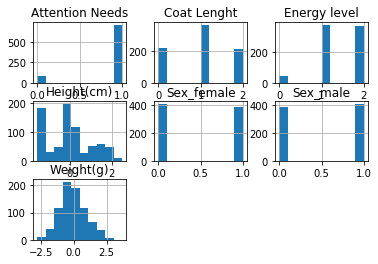

In [155]:
if not full_one_hot:
    features.hist()

Au fost vizualizate dependentele valorilor longevitatii in functie de celelalte label-uri continue sidistributia claselor in functie de cele doua valori continue.

Se poate observa ca datele introduse in locul valorilor lipsa(al patrulea plot) respecta distributia reala(al treilea plot).

Din primele doua plot-uri, se poate vedea ca longevitatea depinde de cele doua feature-uri continue, iar din al treilea plot se observa cum o parte din clase pot fi separate folosind doar feature-urile continue. Doua din patru clase se suprapun daca sunt considerate doar aceste informatii. Cu toate acestea, modelele propuse vor dispune de mai multe informatii, reusind astfel sa separe mai bine clasele.

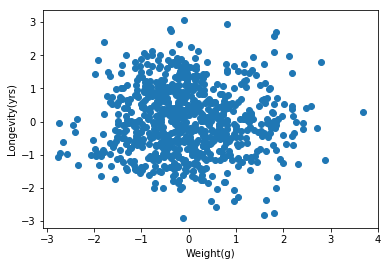

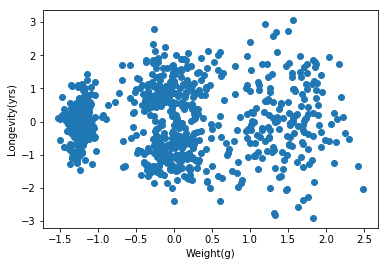

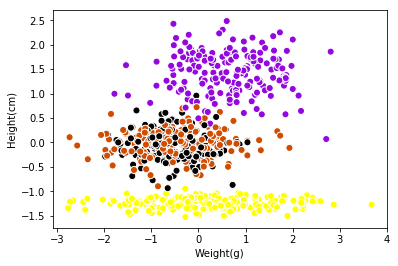

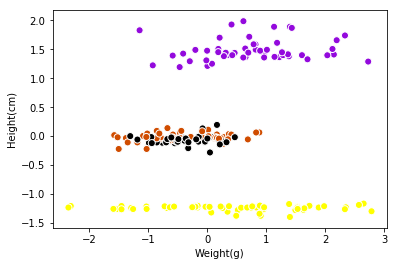

In [69]:
from sklearn import preprocessing

plt.figure()
plt.xlabel("Weight(g)")
plt.ylabel("Longevity(yrs)")
plt.plot(features["Weight(g)"], labels_reg, "o")
plt.figure()
plt.xlabel("Weight(g)")
plt.ylabel("Longevity(yrs)")
plt.plot(features["Height(cm)"], labels_reg, "o")
plt.figure()
plt.xlabel("Weight(g)")
plt.ylabel("Height(cm)")
plt.scatter(features["Weight(g)"], features["Height(cm)"], c=labels_cls.values.reshape(-1), s=50,
           cmap="gnuplot",
           edgecolor="white", linewidth=1)

if keep_incomplete_data:
    plt.figure()
    plt.xlabel("Weight(g)")
    plt.ylabel("Height(cm)")
    plt.scatter(modified_features["Weight(g)"], modified_features["Height(cm)"], c=modified_labels_cls.values.reshape(-1), s=50,
               cmap="gnuplot",
               edgecolor="white", linewidth=1)

In [156]:
X = features.values.tolist()
y_cls = labels_cls.values.tolist()
y_cls = np.reshape(y_cls, (-1))
y_reg = labels_reg.values.tolist()
y_reg = np.reshape(y_reg, (-1))

modified_X = modified_features.values.tolist()
modified_y_cls = modified_labels_cls.values.tolist()
modified_y_cls = np.reshape(modified_y_cls, (-1))
modified_y_reg = modified_labels_reg.values.tolist()
modified_y_reg = np.reshape(modified_y_reg, (-1))

# Classification

Definitia functiei de plotare a probabilitatii existentei unei clase intr-un anumit punct in functie de model.

Au fost considerate puncte intre cele mai mici si cele mai mari valori ale datelor continue, iar pentru a putea fi reprezentata decizia intr-un plan 2D, celelalte feature-uri au fost considerate a fi valorile medii ale setului de date.

Pentru plot, au fost alese datele de test.

In [157]:
def plot_decision_boundary(model, X, y, poly_feat, cls_no=0):
  
    X = np.array(X)
    y = np.array(y)

    if full_one_hot:
        extra_features = np.array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1])
    else:
        extra_features = np.array([1, 1, 1, 0, 0])

    xx, yy = np.mgrid[X[:,1].min():X[:,1].max():0.01, X[:,2].min():X[:,2].max():0.01]
    grid = np.c_[xx.ravel(), yy.ravel()]

    c = np.tile(extra_features[np.newaxis,:], (grid.shape[0],1))
    d = np.concatenate((grid, c), axis=1)

    feat = poly_feat.fit_transform(d)

    probs = model.predict_proba(feat)[:, cls_no].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap='YlGn')
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = {cls_no})$")

    ax.scatter(X[:,1], X[:, 2], c=y, s=50,
             cmap="gnuplot",
             edgecolor="white", linewidth=1)
    
    ax.set(aspect="auto",
         xlabel="Weight(g)", ylabel="Height(cm)")
  

Sunt construite modelele de regresie.
Datele au fost imaprtite in test si validare, iar apoi datele de validare au fost impartite din nou in alte 10 fold-uri pentru cross validare.
Au fost considerate 3 metrici de evaluare: acuratete, precizie si F1 score. Valorile finale ale acestora reprezinta media pe subseturile de validare.

De asemenea, pentru a creea noi feature-uri, feature-urile de baza au fost modificate cu ajutorul PolynomialFeatures. Astfel, functia care separa clasele poate avea o forma mult mai complexa.

In compararea modelelor, a fost considerata doar valoarea F1 score.

Performanta fiecarui model pentru fiecare clasa a fost plotata cu ajutorul functiei definite mai sus.

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

X = np.array(X)

X_train, X_test = train_test_split(X, test_size=0.25, random_state=2)
y_train, y_test = train_test_split(y_cls, test_size=0.25, random_state=2)

logistic_regression_accuracy = []
knn_accuracy = []
random_forest_accuracy = []
logistic_regression_precision = []
knn_precision = []
random_forest_precision = []
logistic_regression_f1 = []
knn_f1 = []
random_forest_f1 = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    if not modified_features.empty:
        X_fold_train = np.concatenate([X_fold_train, modified_X], axis=0)
        y_fold_train = np.concatenate([y_fold_train, modified_y_cls], axis=0)
    
    poly_feat = PolynomialFeatures(degree=polynomial_degree)
    X_preprocessed = poly_feat.fit_transform(X_fold_train)
    
    logistic_regression_model = LogisticRegression(penalty=logistic_penalty, C=logistic_C, multi_class=logistic_multiclass, solver=logistic_solver)
    random_forest_model = RandomForestClassifier(n_estimators=random_forest_n_estimators, criterion=random_forest_criterion)
    knn_model = KNeighborsClassifier(n_neighbors=knn_n_neighbours, p=knn_p, algorithm=knn_algorithm)

    logistic_regression_model.fit(X_preprocessed, y_fold_train)
    knn_model.fit(X_preprocessed, y_fold_train)
    random_forest_model.fit(X_preprocessed, y_fold_train)

    logistic_regression_precision.append(precision_score(y_fold_val, logistic_regression_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))
    knn_precision.append(precision_score(y_fold_val, knn_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))
    random_forest_precision.append(precision_score(y_fold_val, random_forest_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))
    
    logistic_regression_accuracy.append(accuracy_score(y_fold_val, logistic_regression_model.predict(poly_feat.fit_transform(X_fold_val))))
    knn_accuracy.append(accuracy_score(y_fold_val, knn_model.predict(poly_feat.fit_transform(X_fold_val))))
    random_forest_accuracy.append(accuracy_score(y_fold_val, random_forest_model.predict(poly_feat.fit_transform(X_fold_val))))
    
    logistic_regression_f1.append(f1_score(y_fold_val, logistic_regression_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))
    knn_f1.append(f1_score(y_fold_val, knn_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))
    random_forest_f1.append(f1_score(y_fold_val, random_forest_model.predict(poly_feat.fit_transform(X_fold_val)), average="weighted"))

print('Logistic Acuracy     : ', np.mean(logistic_regression_accuracy))
print('Knn Acuracy          : ', np.mean(knn_accuracy))
print('Random forest Acuracy: ', np.mean(random_forest_accuracy))
print()
print('Logistic Precision     : ', np.mean(logistic_regression_precision))
print('Knn Precision          : ', np.mean(knn_precision))
print('Random forest Precision: ', np.mean(random_forest_precision))
print()
print('Logistic F1     : ', np.mean(logistic_regression_f1))
print('Knn F1          : ', np.mean(knn_f1))
print('Random forest F1: ', np.mean(random_forest_f1))


Logistic Acuracy     :  0.9373451075345394
Knn Acuracy          :  0.9187295257085886
Random forest Acuracy:  0.933983762996724

Logistic Precision     :  0.9375312686279786
Knn Precision          :  0.9212070856090703
Random forest Precision:  0.9352497520439794

Logistic F1     :  0.9371541785327689
Knn F1          :  0.9194218622047948
Random forest F1:  0.9338191178192797


Sunt plotate cele mai bune modele din fiecare categorie.

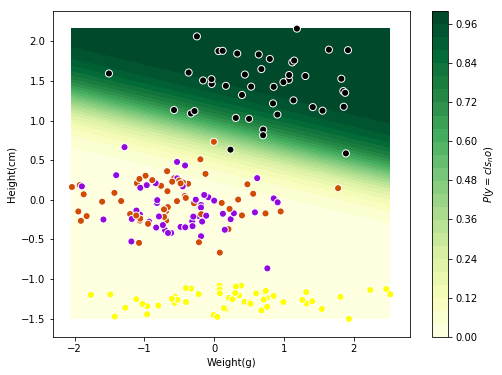

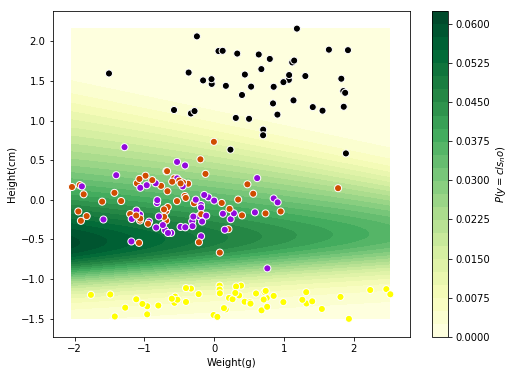

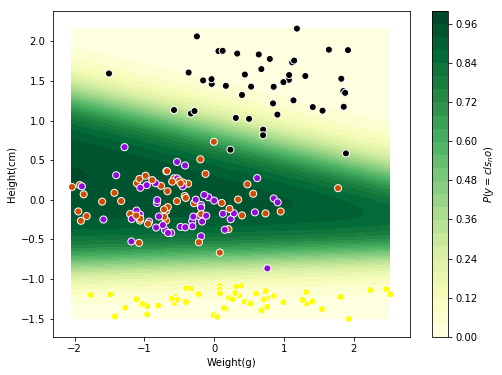

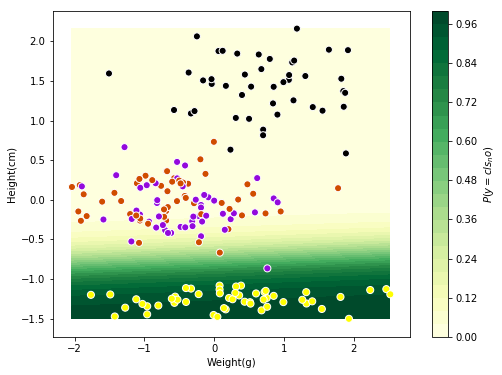

In [105]:
for i in range(4):
    plot_decision_boundary(logistic_regression_model, poly_feat.fit_transform(X_test), y_test, poly_feat, cls_no=i)

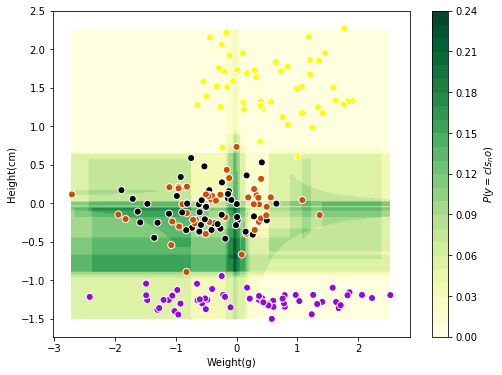

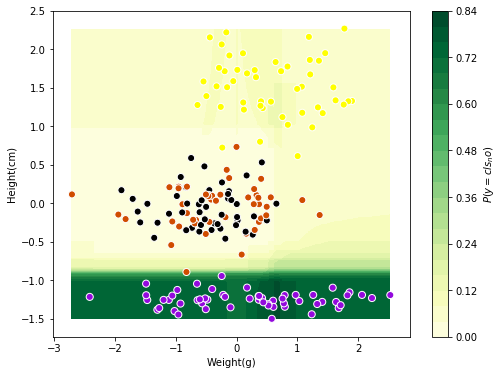

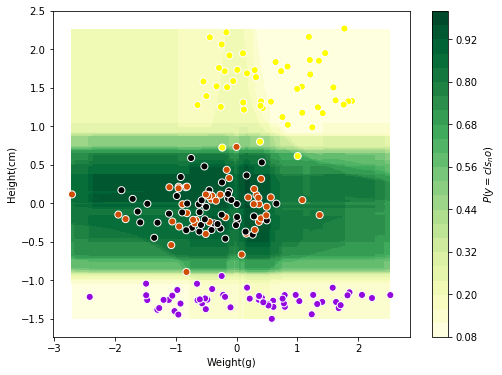

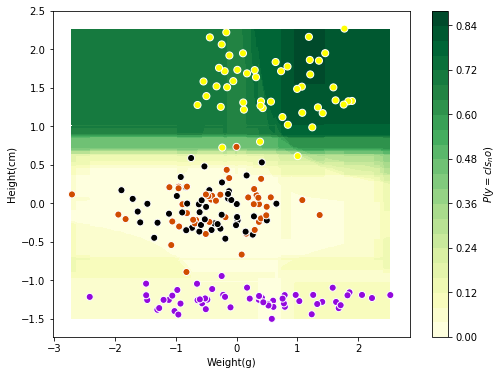

In [143]:
for i in range(4):
    plot_decision_boundary(random_forest_model, poly_feat.fit_transform(X_test), y_test, poly_feat, cls_no=i)

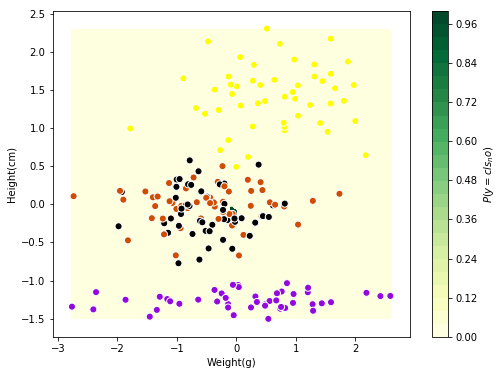

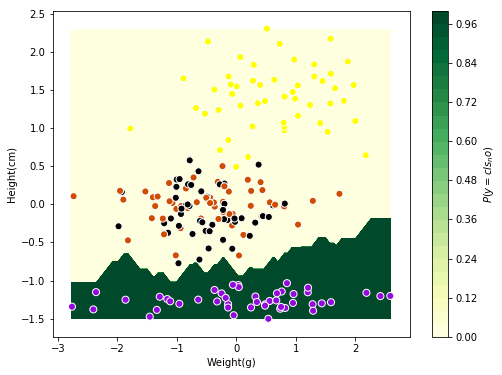

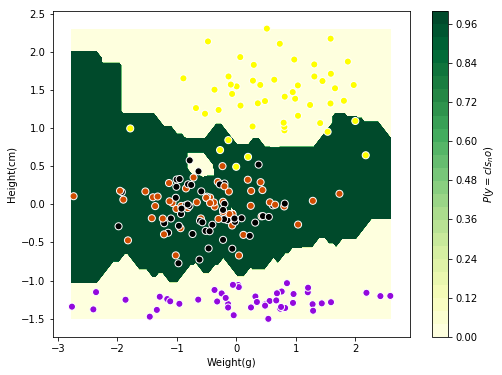

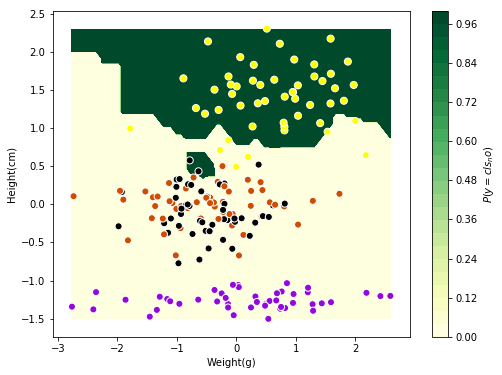

In [159]:
for i in range(4):
    plot_decision_boundary(knn_model, poly_feat.fit_transform(X_test), y_test, poly_feat, cls_no=i)

# Regression

A fost definita o functie care afiseaza valoraea reala si valoarea prezisa, impreuna cu distanta dintre acestea.

In [108]:
def plot_distances(gt, prediction):
    plt.figure(figsize=(25, 5), dpi=80)
    plt.xlabel("Example number")
    plt.ylabel("Longevity(yrs)")
    plt.plot(range(len(gt)), gt, "og")
    plt.plot(range(len(gt)), prediction, "or")
    plt.errorbar(range(len(gt)), (prediction + gt)/2, yerr=np.abs(prediction - gt)/2, fmt='.k', ecolor="gray")

A fost abordata aceeasi metoda de creare a modelelor ca in cazul clasificarii.

Si in acest caz a fost aplicata functia PolynomialFeatures pentru a modela o functie de regresie mai complexa.

Pentru plot si masurarea performantei retelei, au fost alese datele de test.

109623.915443048
linear_regression_mse:  1.0033977984161249
lasso_mse            :  1.1945293452769827
ridge_mse            :  1.0030921225891551
elastic_net_mse      :  1.1945293452769827
knr_mse              :  0.8864690039916567


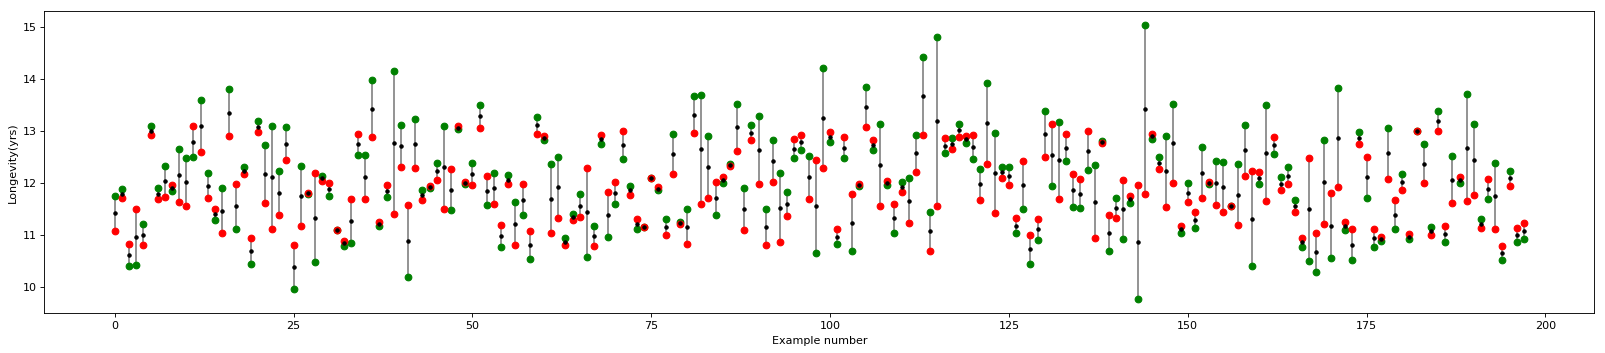

In [109]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = np.array(X)

X_train, X_test = train_test_split(X, test_size=0.25, random_state=2)
y_train, y_test = train_test_split(y_reg, test_size=0.25, random_state=2)

linear_regression_mse = []
lasso_mse = []
ridge_mse = []
elastic_net_mse = []
knr_mse = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    if not modified_features.empty:
        X_fold_train = np.concatenate([X_fold_train, modified_X], axis=0)
        y_fold_train = np.concatenate([y_fold_train, modified_y_cls], axis=0)

    linear_regression_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), LinearRegression(fit_intercept=reg_fit_intercept))
    linear_regression_model.fit(X_fold_train, y_fold_train)
    
    lasso_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), Lasso(fit_intercept=reg_fit_intercept, alpha=lasso_alpha))
    lasso_model.fit(X_fold_train, y_fold_train)
    
    ridge_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), Ridge(fit_intercept=reg_fit_intercept, alpha=ridge_alpha, solver=ridge_solver))
    ridge_model.fit(X_fold_train, y_fold_train)
    
    elastic_net_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), ElasticNet(fit_intercept=reg_fit_intercept, alpha=el_net_alpha, l1_ratio=el_net_l1_ratio))
    elastic_net_model.fit(X_fold_train, y_fold_train)
    
    knr_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), KNeighborsRegressor(n_neighbors=knr_n_neighbors, weights=knr_weights, p=knr_p))
    knr_model.fit(X_fold_train, y_fold_train)

    if normalize_data:
        linear_regression_mse.append(np.mean((linear_regression_model.predict(X_fold_val)*longevity_norm - y_fold_val*longevity_norm) ** 2))
        lasso_mse.append(np.mean((lasso_model.predict(X_fold_val)*longevity_norm - y_fold_val*longevity_norm) ** 2))
        ridge_mse.append(np.mean((ridge_model.predict(X_fold_val)*longevity_norm - y_fold_val*longevity_norm) ** 2))
        elastic_net_mse.append(np.mean((elastic_net_model.predict(X_fold_val)*longevity_norm - y_fold_val*longevity_norm) ** 2))
        knr_mse.append(np.mean((knr_model.predict(X_fold_val)*longevity_norm - y_fold_val*longevity_norm) ** 2))
    else:
        linear_regression_mse.append(np.mean((linear_regression_model.predict(X_fold_val)*longevity_std+longevity_mean - y_fold_val*longevity_std-longevity_mean) ** 2))
        ridge_mse.append(np.mean((ridge_model.predict(X_fold_val)*longevity_std+longevity_mean - y_fold_val*longevity_std-longevity_mean) ** 2))
        lasso_mse.append(np.mean((lasso_model.predict(X_fold_val)*longevity_std+longevity_mean - y_fold_val*longevity_std-longevity_mean) ** 2))
        elastic_net_mse.append(np.mean((elastic_net_model.predict(X_fold_val)*longevity_std+longevity_mean - y_fold_val*longevity_std-longevity_mean) ** 2))
        knr_mse.append(np.mean((knr_model.predict(X_fold_val)*longevity_std+longevity_mean - y_fold_val*longevity_std-longevity_mean) ** 2))

if normalize_data:
    linear_regression_test_prediction = linear_regression_model.predict(X_test)*longevity_norm
    lasso_test_prediction = lasso_model.predict(X_test)*longevity_norm
    ridge_test_prediction = ridge_model.predict(X_test)*longevity_norm
    elastic_net_test_prediction = elastic_net_model.predict(X_test)*longevity_norm
    knr_test_prediction = knr_model.predict(X_test)*longevity_norm
    real_scale_test_gt = y_test*longevity_norm
else:
    linear_regression_test_prediction = linear_regression_model.predict(X_test)*longevity_std+longevity_mean
    lasso_test_prediction = lasso_model.predict(X_test)*longevity_std+longevity_mean
    ridge_test_prediction = ridge_model.predict(X_test)*longevity_std+longevity_mean
    elastic_net_test_prediction = elastic_net_model.predict(X_test)*longevity_std+longevity_mean
    knr_test_prediction = knr_model.predict(X_test)*longevity_std+longevity_mean
    real_scale_test_gt = y_test*longevity_std+longevity_mean

# plot_distances(real_scale_test_gt, linear_regression_test_prediction)
# plot_distances(real_scale_test_gt, lasso_test_prediction)
# plot_distances(real_scale_test_gt, ridge_test_prediction)
# plot_distances(real_scale_test_gt, elastic_net_test_prediction)
plot_distances(real_scale_test_gt, knr_test_prediction)

linear_regression_real_scale_val = np.mean(linear_regression_mse)
lasso_real_scale_val = np.mean(lasso_mse)
ridge_real_scale_val = np.mean(ridge_mse)
elastic_net_real_scale_val = np.mean(elastic_net_mse)
knr_real_scale_val = np.mean(knr_mse)

print(np.mean((ridge_model.predict(X_test)*longevity_norm - y_test*longevity_norm) ** 2))

print("linear_regression_mse: ", linear_regression_real_scale_val)
print("lasso_mse            : ", lasso_real_scale_val)
print("ridge_mse            : ", ridge_real_scale_val)
print("elastic_net_mse      : ", elastic_net_real_scale_val)
print("knr_mse              : ", knr_real_scale_val)

In [110]:
print(np.array([real_scale_test_gt, knr_test_prediction]).transpose())

[[11.74939432 11.07605252]
 [11.87873766 11.69931301]
 [10.40208452 10.82452084]
 [10.41108058 11.48658615]
 [11.2093309  10.79233017]
 [13.08410964 12.91115468]
 [11.89523043 11.68458902]
 [12.31564627 11.72903878]
 [11.8359564  11.95139624]
 [12.65099936 11.6321053 ]
 [12.46927897 11.54911162]
 [12.49006986 13.08065535]
 [13.58838873 12.58868043]
 [12.17910608 11.71049968]
 [11.28439802 11.49500663]
 [11.89003271 11.03728643]
 [13.79769704 12.89339672]
 [11.1104742  11.98166969]
 [12.29625476 12.15790265]
 [10.43517003 10.94380236]
 [13.17706891 12.96974415]
 [12.72656626 11.61594208]
 [13.09590447 11.10792224]
 [12.22438625 11.38566434]
 [13.06311883 12.4428006 ]
 [ 9.9608778  10.79352594]
 [12.3217436  11.16653572]
 [11.78437899 11.80246869]
 [10.47645194 12.17958705]
 [12.1295278  12.03315642]
 [11.74649559 11.99953945]
 [11.08658467 11.0794435 ]
 [10.78841529 10.88001969]
 [10.8472895  11.68115413]
 [12.53994801 12.93027949]
 [12.53824875 11.68957334]
 [13.98151652 12.86874163]
 